In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

whole = False

In [2]:
data = pd.read_excel('data/2023_12_laezza_deltamethrin_metabolomics.xlsx')
data_old = pd.read_excel('data/2022_12_Laezza_Bernabucci_Mouse_Brain_COMBINED_METABOLOMICS.xlsx')

In [3]:
data_old = data_old[data_old['Sex']=='M']
data_old = data_old[data_old['Tissue Type']=='striatum']
data_old = data_old[data_old['PND']==30]

In [4]:
columns_data = ['LCMS Name', 'Tissue Weight\n(mg)', 'Treatment', 'Metabolite', 'Normalized Peak Area (Peak Area of Metabolite / (Peak Area of Internal Standard * Tissue weight))']
columns_old = ['Sample Name', 'Tissue weight\n(mg)', 'Treatment', 'Metabolite', 'Normalized Peak Area\n(Peak Area of Metabolite / (Peak Area of Internal Standard * Tisue weight))']
columns_new = ['name','weight','treatment','metabolite','area']

data = data[columns_data]
data.columns = columns_new
data['batch']=1
data_old = data_old[columns_old]
data_old.columns = columns_new
data_old['batch']=0
if whole:
    data_all = pd.concat([data, data_old], axis=0)
    data_all = data_all[data_all['area']!=0]
else:
    data_all = data.copy()
data_all['area'] = np.log(data_all['area'])

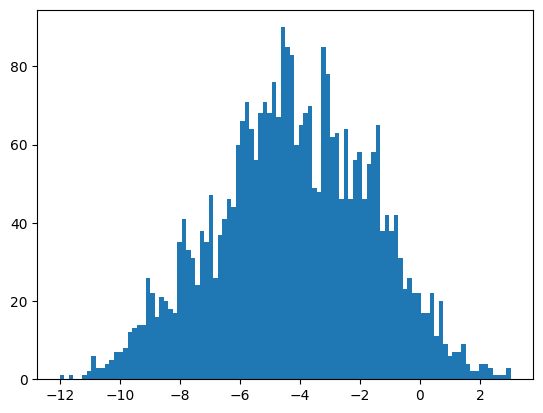

In [5]:
plt.figure()
plt.hist(data_all.iloc[:,-2],bins=100)
plt.show()

## TTEST

In [6]:
from scipy.stats import ranksums, ttest_ind

res = []
for t in np.unique(data_all['metabolite']):
    data_part = data_all[data_all['metabolite'] == t]
    a = data_part[data_part['treatment'] == 'control']['area'].values
    b = data_part[data_part['treatment'] == 'deltamethrin']['area'].values
    p_t = ttest_ind(a,b).pvalue
    p_r = ranksums(a,b).pvalue
    res.append([t, len(a), len(b), p_t, p_r, np.mean(a)<np.mean(b)])

res = pd.DataFrame(res)
res.columns=['metabolite','n_control', 'n_treated', 'p_ttest', 'p_ranksum', 'upregulated']
res = res[(res['p_ttest']<0.05) | (res['p_ranksum']<0.05)]
res.to_csv(os.path.join('data', 'results_metabolites_whole_' + str(whole) + '.csv'))
print(f'{res.shape[0]} significant metabolites')

2 significant metabolites
